iFood 2019 - Foodx251-Dataset

You are given a dataset containing the food images and their food-category label. This dataset contains 251 food 
categories with 118,475 training images collected from the web. Human verified labels are provided for both the 
validation set of 11,994 images and the test set of 28,377 images.

## Import Libraries

In [ ]:
import os
import pickle
import datetime
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from IPython.display import display, Image  

## Unzipping Images

In [ ]:
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


In [ ]:
# Mount drive

from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/ifood-2019-fgvc6.zip"

Archive:  /content/drive/MyDrive/ifood-2019-fgvc6.zip
  inflating: class_list.txt          
  inflating: ifood2019_sample_submission.csv  
  inflating: sample_submission.csv   
  inflating: test_set.zip            
  inflating: train_labels.csv        
  inflating: train_set.zip           
  inflating: val_labels.csv          
  inflating: val_set.zip             


In [ ]:
!unzip -q "train_set.zip"

Train set: 118475


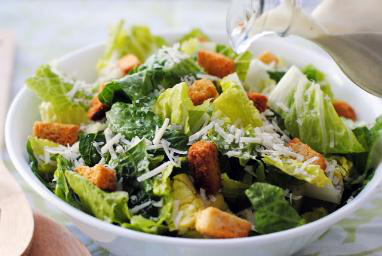

In [ ]:
img1 = tf.keras.preprocessing.image.load_img('train_set/train_000001.jpg')
print('Train set:' , len(os.listdir('/content/train_set')))
img1

In [ ]:
!unzip -q "val_set.zip"

Validation set: 11994


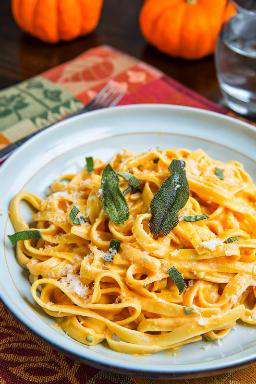

In [ ]:
img2 = tf.keras.preprocessing.image.load_img('val_set/val_000000.jpg')
print('Validation set:' , len(os.listdir('/content/val_set')))
img2

In [ ]:
!unzip -q "test_set.zip"

Test set: 28377


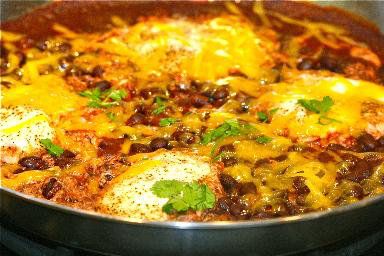

In [ ]:
img3 = tf.keras.preprocessing.image.load_img('test_set/test_000000.jpg')
print('Test set:' , len(os.listdir('/content/test_set')))
img3

## Train, Validation, and Class Labels

In [ ]:
train_labels = pd.read_csv('train_labels.csv')
train_labels['label'] = train_labels['label'].astype(str)
train_labels

,img_name,label
0,train_101733.jpg,211
1,train_101734.jpg,211
2,train_101735.jpg,211
3,train_101736.jpg,211
4,train_101737.jpg,211
...,...,...
118470,train_101728.jpg,123
118471,train_101729.jpg,123
118472,train_101730.jpg,123
118473,train_101731.jpg,123


In [ ]:
val_labels = pd.read_csv('val_labels.csv')
val_labels['label'] = val_labels['label'].astype(str)
val_labels

,img_name,label
0,val_010323.jpg,247
1,val_010324.jpg,234
2,val_010325.jpg,222
3,val_010326.jpg,240
4,val_010327.jpg,218
...,...,...
11989,val_010317.jpg,13
11990,val_010318.jpg,172
11991,val_010319.jpg,72
11992,val_010320.jpg,124


In [ ]:
class_list = pd.read_csv('class_list.txt', sep = " ", header=None)
class_list.columns = ['id', 'name']
class_list['id'] = class_list['id'].astype(str)
class_list

,id,name
0,0,macaron
1,1,beignet
2,2,cruller
3,3,cockle_food
4,4,samosa
...,...,...
246,246,chicken_cordon_bleu
247,247,eccles_cake
248,248,moo_goo_gai_pan
249,249,buffalo_wing


In [ ]:
array_labels = class_list['name'].to_numpy()
array_labels

array(['macaron', 'beignet', 'cruller', 'cockle_food', 'samosa',
       'tiramisu', 'tostada', 'moussaka', 'dumpling', 'sashimi', 'knish',
       'croquette', 'couscous', 'porridge', 'stuffed_cabbage',
       'seaweed_salad', 'chow_mein', 'rigatoni', 'beef_tartare',
       'cannoli', 'foie_gras', 'cupcake', 'osso_buco', 'pad_thai',
       'poutine', 'ramen', 'pulled_pork_sandwich', 'bibimbap',
       'chicken_kiev', 'apple_pie', 'risotto', 'fruitcake', 'chop_suey',
       'haggis', 'scrambled_eggs', 'frittata', 'scampi', 'sushi', 'orzo',
       'fritter', 'nacho', 'beef_stroganoff', 'beef_wellington',
       'spring_roll', 'savarin', 'crayfish_food', 'souffle', 'adobo',
       'streusel', 'deviled_egg', 'escargot', 'club_sandwich',
       'carrot_cake', 'falafel', 'farfalle', 'terrine', 'poached_egg',
       'gnocchi', 'bubble_and_squeak', 'egg_roll', 'caprese_salad',
       'sauerkraut', 'creme_brulee', 'pavlova', 'fondue', 'scallop',
       'jambalaya', 'tempura', 'chocolate_cake', '

In [ ]:
num_cat = len(array_labels)
num_cat

251

### Merging Labels

#### Train

In [ ]:
# Merge train labels (on 'label') and class list (on 'id')
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

label_names_train = pd.merge(train_labels, class_list, left_on = 'label', right_on = 'id')
label_names_train.drop(['label', 'id'], axis=1, inplace=True)
label_names_train

,img_name,name
0,train_101733.jpg,dolmas
1,train_101734.jpg,dolmas
2,train_101735.jpg,dolmas
3,train_101736.jpg,dolmas
4,train_101737.jpg,dolmas
...,...,...
118470,train_101728.jpg,fried_rice
118471,train_101729.jpg,fried_rice
118472,train_101730.jpg,fried_rice
118473,train_101731.jpg,fried_rice


In [ ]:
array_train_labels = label_names_train['name'].to_numpy()
array_train_labels

array(['dolmas', 'dolmas', 'dolmas', ..., 'fried_rice', 'fried_rice',
       'fried_rice'], dtype=object)

In [ ]:
bool_train_labels = [i == np.array(array_labels) for i in array_train_labels]

In [ ]:
bool_train_labels[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
print(array_train_labels[0])
array_train_labels[0] == array_labels

dolmas


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

### Val

In [ ]:
label_names_val = pd.merge(val_labels, class_list, left_on = 'label', right_on = 'id')
label_names_val.drop(['label', 'id'], axis = 1, inplace = True)
label_names_val

,img_name,name
0,val_010323.jpg,eccles_cake
1,val_010350.jpg,eccles_cake
2,val_010389.jpg,eccles_cake
3,val_010404.jpg,eccles_cake
4,val_010471.jpg,eccles_cake
...,...,...
11989,val_006665.jpg,limpet_food
11990,val_007712.jpg,limpet_food
11991,val_008322.jpg,limpet_food
11992,val_008666.jpg,limpet_food


In [ ]:
array_val_labels = label_names_val['name'].to_numpy()
array_val_labels

array(['eccles_cake', 'eccles_cake', 'eccles_cake', ..., 'limpet_food',
       'limpet_food', 'limpet_food'], dtype=object)

In [ ]:
bool_val_labels = [i == np.array(array_labels) for i in array_val_labels]

## Filepaths To Train, Val, and Test

In [ ]:
train_dir = ["/content/train_set/" + name for name in label_names_train["img_name"]]
val_dir = ["/content/val_set/" + name for name in label_names_val["img_name"]]

In [ ]:
test_path = "/content/test_set/"
test_dir = [test_path + name for name in os.listdir(test_path)]

### Train

In [ ]:
train_dir[:5]

['/content/train_set/train_101733.jpg',
 '/content/train_set/train_101734.jpg',
 '/content/train_set/train_101735.jpg',
 '/content/train_set/train_101736.jpg',
 '/content/train_set/train_101737.jpg']

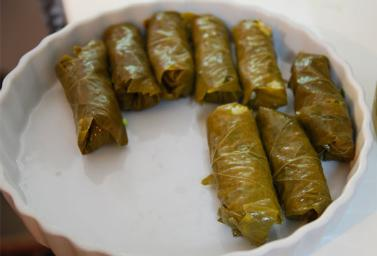

In [ ]:
Image(train_dir[5])

### Val

In [ ]:
val_dir[:5]

['/content/val_set/val_010323.jpg',
 '/content/val_set/val_010324.jpg',
 '/content/val_set/val_010325.jpg',
 '/content/val_set/val_010326.jpg',
 '/content/val_set/val_010327.jpg']

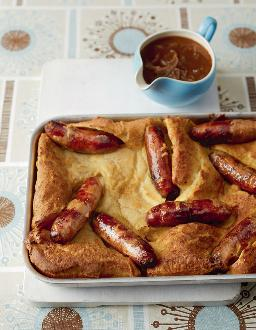

In [ ]:
Image(val_dir[5])

In [ ]:
len(train_dir), len(bool_train_labels), len(val_dir), len(bool_val_labels)

(118475, 118475, 11994, 11994)

### Test

In [ ]:
test_dir[:5]

['/content/test_set/test_007862.jpg',
 '/content/test_set/test_025267.jpg',
 '/content/test_set/test_026034.jpg',
 '/content/test_set/test_018879.jpg',
 '/content/test_set/test_024660.jpg']

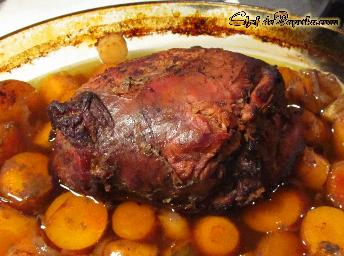

In [ ]:
Image(test_dir[5])

## Input Image

### Turning Image into Tensors

In [ ]:
# Set image size
# Depends on the model used
img_size = 224

def process_image(img_path):
  # Read an image file
  img = tf.io.read_file(img_path)
  # Convert the jpeg image into numerical Tensor with RGB color channels
  # Use decode_jpeg because decode_image returns error "'images' contains no shape" https://stackoverflow.com/questions/44942729/tensorflowvalueerror-images-contains-no-shape
  img = tf.image.decode_jpeg(img, channels = 3)
  # Scale down the color channel values from 0-225 to 0-1
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Resize the image to the defined image size
  img = tf.image.resize(img, size = [img_size, img_size])
  return img

In [ ]:
# Function to return a tuple of (image, label)
def get_image_label(img_path, label):
  img = process_image(img_path)
  return img, label

### Function to Create Batch

#### Train Batch

In [ ]:
# Define the batch size. 32 is recommended https://www.sciencedirect.com/science/article/pii/S2405959519303455#:~:text=In%20practical%20terms%2C%20to%20determine,advantage%20of%20the%20GPUs%20processing.
batch_size = 32

# Function to create train batch
def create_train_batch(x, y): # x = filepaths, y = labels
  data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
  # Only train images that needs to be shuffled
  data = data.shuffle(buffer_size = len(x))
  # Create (image, label) tuples. Turns the image path into a preprocessed image 
  # And turn the preprocessed it into batches
  train_batch = data.map(get_image_label).batch(batch_size)
  return train_batch

In [ ]:
train_img = create_train_batch(train_dir, bool_train_labels)
train_img

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 251), dtype=tf.bool, name=None))>

#### Val Batch

In [ ]:
# Function to create val batch
def create_val_batch(x, y):
  data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
  val_batch = data.map(get_image_label).batch(batch_size)
  return val_batch

In [ ]:
val_img = create_val_batch(val_dir, bool_val_labels)
val_img

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 251), dtype=tf.bool, name=None))>

#### Test Batch

In [ ]:
# Function to create test batch
def create_test_batch(x):
  data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
  test_batch = data.map(process_image).batch(batch_size)
  return test_batch

### Show Batch

#### Train

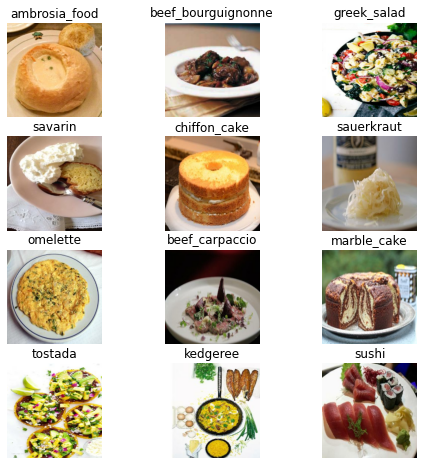

In [ ]:
# Turning batch images to an iterable form using .as_numpy_iterator(). Use next() to iterate to the next item
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset#as_numpy_iterator

train_images, train_labels = next(train_img.as_numpy_iterator())

plt.figure(figsize=(8, 8))
for i in range(12):
  ax = plt.subplot(4, 3, i+1)
  plt.imshow(train_images[i])
  plt.title(array_labels[train_labels[i].argmax()])
  plt.axis("off")

#### Val

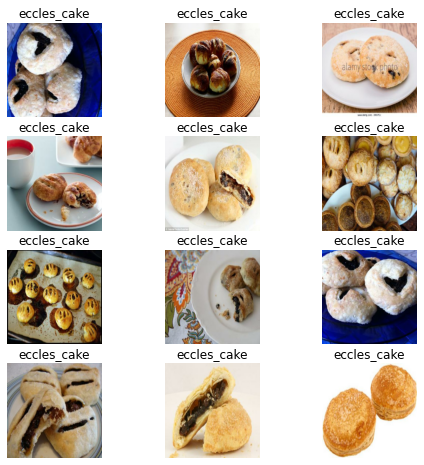

In [ ]:
val_images, val_labels = next(val_img.as_numpy_iterator())

plt.figure(figsize=(8, 8))
for i in range(12):
  ax = plt.subplot(4, 3, i+1)
  plt.imshow(val_images[i])
  plt.title(array_labels[val_labels[i].argmax()])
  plt.axis("off")

## Model

In [ ]:
# https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/classification/2"),
    tf.keras.layers.Dense(units = 251, activation = "softmax")
  ])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.build([None, img_size, img_size, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              7200312   
                                                                 
 dense (Dense)               (None, 251)               251251    
                                                                 
Total params: 7,451,563
Trainable params: 251,251
Non-trainable params: 7,200,312
_________________________________________________________________


### Early Stopping

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

# Early stopping to stop model training when there's little to no improvements

callbacks_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy", patience = 3)

### Checkpoints

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

# Checkpoints to save model after every epoch
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
from keras.callbacks import TensorBoard

model_dir = os.path.join("models-checkpoint",
                          datetime.datetime.now().strftime("%Y-%m-%d-%H-%M"))
model_path = model_dir + "-" + '{epoch:02d}' + '-' + 'checkpoint' + ".h5"
checkpoint     = ModelCheckpoint(model_path, monitor = 'accuracy', save_weights_only = False)
callbacks_checkpoint = [checkpoint]

### Fit Model

In [ ]:
epochs = 20

model.fit(train_img,
          validation_data = val_img,
          callbacks = [callbacks_stopping, callbacks_checkpoint],
          epochs = epochs)

Epoch 1/20
3703/3703 [==============================] - 439s 114ms/step - loss: 2.9983 - accuracy: 0.3848 - val_loss: 2.1927 - val_accuracy: 0.4932
Epoch 2/20
3703/3703 [==============================] - 421s 114ms/step - loss: 2.5080 - accuracy: 0.4662 - val_loss: 2.2490 - val_accuracy: 0.4982
Epoch 3/20
3703/3703 [==============================] - 418s 113ms/step - loss: 2.3498 - accuracy: 0.4912 - val_loss: 2.2572 - val_accuracy: 0.5053
Epoch 4/20
3703/3703 [==============================] - 417s 112ms/step - loss: 2.2513 - accuracy: 0.5098 - val_loss: 2.2451 - val_accuracy: 0.5082
Epoch 5/20
3703/3703 [==============================] - 413s 112ms/step - loss: 2.1790 - accuracy: 0.5214 - val_loss: 2.2475 - val_accuracy: 0.5153
Epoch 6/20
3703/3703 [==============================] - 421s 114ms/step - loss: 2.1200 - accuracy: 0.5300 - val_loss: 2.3521 - val_accuracy: 0.5053
Epoch 7/20
3703/3703 [==============================] - 422s 114ms/step - loss: 2.0670 - accuracy: 0.5409 - val_

#### Continue Training

In [ ]:
# Load model
loaded_model = tf.keras.models.load_model("/content/models-checkpoint/2022-03-05-01-03-25-checkpoint(EfficientnetV2-75-Epochs).h5",
                                     custom_objects = {"KerasLayer":hub.KerasLayer})

In [ ]:
epochs = 25

loaded_model.fit(train_img,
                       validation_data = val_img,
                       callbacks = [callbacks_stopping, callbacks_checkpoint],                             
                       epochs = epochs)

Epoch 1/25
3703/3703 [==============================] - 436s 113ms/step - loss: 1.4394 - accuracy: 0.6555 - val_loss: 3.4425 - val_accuracy: 0.4862
Epoch 2/25
3703/3703 [==============================] - 420s 113ms/step - loss: 1.4274 - accuracy: 0.6568 - val_loss: 3.5205 - val_accuracy: 0.4893
Epoch 3/25
3703/3703 [==============================] - 415s 112ms/step - loss: 1.4280 - accuracy: 0.6582 - val_loss: 3.4793 - val_accuracy: 0.4837
Epoch 4/25
3703/3703 [==============================] - 416s 112ms/step - loss: 1.4278 - accuracy: 0.6589 - val_loss: 3.4629 - val_accuracy: 0.4907
Epoch 5/25
3703/3703 [==============================] - 420s 113ms/step - loss: 1.4249 - accuracy: 0.6583 - val_loss: 3.4895 - val_accuracy: 0.4912
Epoch 6/25
3703/3703 [==============================] - 416s 112ms/step - loss: 1.4182 - accuracy: 0.6603 - val_loss: 3.5555 - val_accuracy: 0.4871
Epoch 7/25
3703/3703 [==============================] - 417s 113ms/step - loss: 1.4201 - accuracy: 0.6607 - val_

### Visualize Predictions

In [ ]:
# Load model
loaded_model = tf.keras.models.load_model("/content/models-checkpoint/2022-03-06-01-12-25-checkpoint(EfficientnetV2-100-Epochs).h5",
                                     custom_objects = {"KerasLayer":hub.KerasLayer})

In [ ]:
# Make predictions on the val data
val_predictions = loaded_model.predict(val_img, verbose = 1)
val_predictions

375/375 [==============================] - 34s 65ms/step


array([[9.85458573e-22, 4.44327952e-07, 1.29469286e-03, ...,
        3.90787650e-16, 1.58127660e-11, 9.36122083e-11],
       [7.98785968e-11, 5.07253390e-07, 9.40665305e-02, ...,
        1.19990684e-10, 1.22474192e-11, 1.74450664e-13],
       [4.45283567e-12, 5.32619637e-08, 1.91492177e-06, ...,
        3.78525850e-10, 1.39196534e-04, 1.01401565e-06],
       ...,
       [1.48068664e-19, 4.67893724e-10, 2.32046465e-10, ...,
        7.53521634e-10, 2.52823520e-05, 1.57357493e-12],
       [8.18124568e-10, 1.07179743e-11, 1.71883023e-08, ...,
        2.25286221e-15, 8.35491480e-14, 1.45872308e-17],
       [1.03955479e-18, 7.91576413e-14, 5.12099163e-09, ...,
        1.00272946e-08, 7.58310428e-16, 5.48912417e-15]], dtype=float32)

In [ ]:
n = 0
print(val_predictions[n])
print(f"Max value (probability of prediction): {np.max(val_predictions[n])}") # the max probability value predicted by the model
print(f"Max index: {np.argmax(val_predictions[n])}") # the index of where the max value in predictions[n] occurs
print(f"Predicted label: {array_labels[np.argmax(val_predictions[n])]}") # the predicted label

[9.85462309e-22 4.44329658e-07 1.29469892e-03 1.18953583e-10
 9.60880681e-14 4.91932675e-11 8.99366356e-13 2.79815393e-09
 6.25587759e-09 3.33922093e-15 3.37340128e-10 5.22172058e-07
 8.86354033e-13 1.22224286e-10 5.06952835e-09 7.96968628e-22
 1.24181943e-10 4.57636020e-15 1.00244833e-10 4.10457369e-06
 1.18236251e-07 5.12459380e-16 8.23863616e-11 3.36471398e-17
 4.97267366e-11 4.39349723e-10 2.83090084e-16 5.48111835e-14
 1.57913546e-05 1.31325451e-05 2.48763900e-12 7.57120739e-15
 2.92706570e-08 2.30349644e-04 1.54602334e-14 1.77842394e-10
 7.31574619e-05 2.94017184e-07 1.60751810e-14 1.63513469e-08
 5.03664355e-09 1.08211907e-16 2.97857980e-07 3.77344093e-11
 3.20763860e-10 7.72982744e-09 5.52636905e-08 7.98482114e-12
 3.19965565e-08 7.24837874e-14 2.77811596e-09 1.24240028e-13
 1.99339079e-09 1.54594782e-05 8.20975673e-15 1.75815817e-09
 9.63716953e-13 1.73452597e-09 1.36487772e-08 8.22342749e-10
 3.54147245e-12 3.19315352e-10 2.48765331e-12 2.41309777e-17
 2.51482103e-13 1.353212

In [ ]:
# Turn prediction probabilities into labels
def get_pred_label(prediction_probabilities):
  return array_labels[np.argmax(prediction_probabilities)]

In [ ]:
# Get the predicted label
pred_label = get_pred_label(val_predictions[0])
pred_label

'eccles_cake'

#### Unbatch Batch Images

In [ ]:
# Create a function to unbatch an image batch
def unbatching(data):
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(array_labels[np.argmax(label)])
  return images, labels

In [ ]:
# Unbatching the validation data
val_img, val_labels = unbatching(val_img)
val_img[0], val_labels[0]

(array([[[0.14678435, 0.18992162, 0.30821642],
         [0.19389006, 0.23605569, 0.3645302 ],
         [0.3338604 , 0.37145668, 0.515585  ],
         ...,
         [0.0020583 , 0.08818757, 0.48177662],
         [0.02970235, 0.13183689, 0.53471744],
         [0.08773706, 0.19721702, 0.615529  ]],
 
        [[0.10409039, 0.14722766, 0.26706433],
         [0.22164743, 0.26443768, 0.39360622],
         [0.3973064 , 0.4374237 , 0.58585685],
         ...,
         [0.02713558, 0.12355533, 0.5180143 ],
         [0.03003141, 0.13397045, 0.53721297],
         [0.01523204, 0.12471201, 0.5447047 ]],
 
        [[0.15567291, 0.1974096 , 0.3271015 ],
         [0.30653387, 0.35021386, 0.48282063],
         [0.4557698 , 0.50430864, 0.6532838 ],
         ...,
         [0.01348272, 0.10347805, 0.50015974],
         [0.01490785, 0.1171118 , 0.52568394],
         [0.02120081, 0.13068078, 0.55683595]],
 
        ...,
 
        [[0.08879557, 0.28879556, 0.74042374],
         [0.08719929, 0.28747693, 0.74956

In [ ]:
# Function to view prediction, true label, and image for sample n
def plot_pred(prediction_probabilities, labels, images, n = 1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the predicted label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Set green for the correct prediction and red for the wrong prediction
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color = color)

In [ ]:
# View an example prediction, original image, and truth label
plot_pred(prediction_probabilities = val_predictions,
          labels = val_labels,
          images = val_img, n = 345)

#### Plot top 10 labels

In [ ]:
# Function to plot top 10 prediction for sample n
def plot_pred_conf(prediction_probabilities, labels, n = 1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Get the prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Get the prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Get the prediction labels
  top_10_pred_labels = array_labels[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color = "grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")

  # Set green for the correct label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

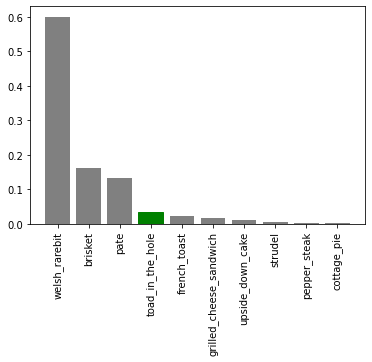

In [ ]:
plot_pred_conf(prediction_probabilities = val_predictions,
               labels = val_labels,
               n = 210)

### Visualize Predictions

In [ ]:
# Make predictions on the val data
predictions = model.predict(val_samples, verbose = 1)
predictions

56/56 [==============================] - 5s 70ms/step


array([[2.2176071e-08, 2.5855178e-09, 4.1550677e-10, ..., 9.2626635e-09,
        4.9049071e-09, 3.3261045e-07],
       [3.0986882e-12, 3.2336623e-13, 3.3712681e-13, ..., 6.3451696e-12,
        1.2887164e-11, 7.8177319e-11],
       [3.0107716e-07, 9.5908312e-09, 4.5191022e-08, ..., 9.4590433e-08,
        7.4828586e-07, 4.9041552e-07],
       ...,
       [9.6052654e-12, 1.3971095e-12, 2.3207123e-13, ..., 1.7743310e-11,
        1.9164391e-11, 8.2623665e-12],
       [5.4337108e-09, 6.4576719e-11, 3.6425074e-09, ..., 1.6125016e-08,
        6.6987917e-09, 2.5945430e-09],
       [2.6788918e-12, 3.6202395e-14, 4.9893005e-13, ..., 1.2335815e-11,
        4.0177421e-13, 2.4499389e-12]], dtype=float32)

In [ ]:
n = 0
print(predictions[n])
print(f"Max value (probability of prediction): {np.max(predictions[n])}") # the max probability value predicted by the model
print(f"Max index: {np.argmax(predictions[n])}") # the index of where the max value in predictions[n] occurs
print(f"Predicted label: {array_labels[np.argmax(predictions[n])]}") # the predicted label

[2.21760708e-08 2.58551780e-09 4.15506768e-10 2.51182861e-08
 8.93898022e-09 6.35311082e-10 3.56077079e-09 1.75679361e-07
 8.24494393e-08 9.10835141e-09 6.72765443e-09 1.37967238e-08
 4.08718476e-11 4.14253326e-10 4.02476914e-08 3.56550123e-09
 1.57600866e-07 1.24154398e-09 3.52908884e-08 8.30989055e-09
 1.27591396e-10 1.13733396e-08 4.41165771e-09 8.49409609e-09
 3.19253211e-08 5.14279463e-07 1.31437492e-08 1.34588188e-10
 8.90162999e-10 3.59443391e-08 9.86597581e-10 4.81790892e-08
 1.86307986e-07 7.56981644e-10 4.11477110e-08 9.87309612e-09
 1.90030236e-09 3.99452738e-09 4.41788828e-09 1.46211034e-08
 7.24399984e-11 1.01885220e-08 1.92899954e-08 5.06951237e-09
 7.58395871e-08 1.70383785e-07 5.01220732e-10 1.21561271e-07
 6.13514084e-09 3.23546736e-08 1.47540161e-10 3.78552745e-10
 7.84784771e-09 1.17312577e-08 1.27310038e-08 1.74565677e-08
 2.55876724e-08 9.28225496e-10 5.42621459e-09 2.77099371e-10
 3.16569104e-10 6.18502527e-10 2.77269208e-09 6.23901286e-08
 2.32418618e-09 1.185146

In [ ]:
# Turn prediction probabilities into labels
def get_pred_label(prediction_probabilities):
  return array_labels[np.argmax(prediction_probabilities)]

In [ ]:
# Get the predicted label
pred_label = get_pred_label(predictions[0])
pred_label

'profiterole'

#### Unbatch Batch Images

In [ ]:
# Create a function to unbatch an image batch
def unbatching(data):
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(array_labels[np.argmax(label)])
  return images, labels

In [ ]:
# Unbatching the validation data
val_samples, val_labels_samples = unbatching(val_samples)
val_samples[0], val_labels_samples[0]

(array([[[0.14678435, 0.18992162, 0.30821642],
         [0.19389006, 0.23605569, 0.3645302 ],
         [0.3338604 , 0.37145668, 0.515585  ],
         ...,
         [0.0020583 , 0.08818757, 0.48177662],
         [0.02970235, 0.13183689, 0.53471744],
         [0.08773706, 0.19721702, 0.615529  ]],
 
        [[0.10409039, 0.14722766, 0.26706433],
         [0.22164743, 0.26443768, 0.39360622],
         [0.3973064 , 0.4374237 , 0.58585685],
         ...,
         [0.02713558, 0.12355533, 0.5180143 ],
         [0.03003141, 0.13397045, 0.53721297],
         [0.01523204, 0.12471201, 0.5447047 ]],
 
        [[0.15567291, 0.1974096 , 0.3271015 ],
         [0.30653387, 0.35021386, 0.48282063],
         [0.4557698 , 0.50430864, 0.6532838 ],
         ...,
         [0.01348272, 0.10347805, 0.50015974],
         [0.01490785, 0.1171118 , 0.52568394],
         [0.02120081, 0.13068078, 0.55683595]],
 
        ...,
 
        [[0.08879557, 0.28879556, 0.74042374],
         [0.08719929, 0.28747693, 0.74956

In [ ]:
# Function to view prediction, true label, and image for sample n
def plot_pred(prediction_probabilities, labels, images, n = 1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the predicted label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Set green for the correct prediction and red for the wrong prediction
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color = color)

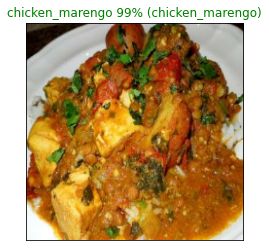

In [ ]:
# View an example prediction, original image, and truth label
plot_pred(prediction_probabilities = predictions,
          labels = val_labels_samples,
          images = val_samples, n = 100)

#### Plot top 10 labels

In [ ]:
# Function to plot top 10 prediction for sample n
def plot_pred_conf(prediction_probabilities, labels, n = 1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Get the prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Get the prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Get the prediction labels
  top_10_pred_labels = array_labels[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color = "grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")

  # Set green for the correct label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

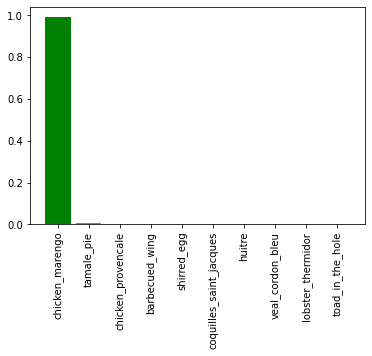

In [ ]:
plot_pred_conf(prediction_probabilities = predictions,
               labels = val_labels_samples,
               n = 100)

## Predict on Test Images

In [ ]:
# Load model
model = tf.keras.models.load_model("/content/models-checkpoint/2022-03-04-22-29-25-checkpoint(EfficientnetV2-25-Epochs).h5",
                                     custom_objects = {"KerasLayer":hub.KerasLayer})

In [ ]:
test_dir[:10]

['/content/test_set/test_005211.jpg',
 '/content/test_set/test_002150.jpg',
 '/content/test_set/test_007922.jpg',
 '/content/test_set/test_002946.jpg',
 '/content/test_set/test_020921.jpg',
 '/content/test_set/test_025085.jpg',
 '/content/test_set/test_010869.jpg',
 '/content/test_set/test_022193.jpg',
 '/content/test_set/test_013999.jpg',
 '/content/test_set/test_001673.jpg']

In [ ]:
len(test_dir)

28377

In [ ]:
# Create batch of test images
test_img = create_test_batch(test_dir)
test_img

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
test_predictions = model.predict(test_img)

In [ ]:
test_predictions.shape

(28377, 251)

In [ ]:
n = 1
print(test_predictions[n])
print(f"Max value (probability of prediction): {np.max(test_predictions[n])}") # get the max probability value predicted by the model
print(f"Max index: {np.argmax(test_predictions[n])}") # get the index of where the max probability value in predictions[n] occurs
print(f"Predicted label: {array_labels[np.argmax(test_predictions[n])]}") # get the predicted label

[2.29099613e-19 3.08185229e-17 3.25973293e-09 1.69955047e-13
 1.60126827e-08 9.72410607e-12 8.80678641e-09 3.32785666e-09
 9.26138632e-09 3.67845106e-03 2.96968835e-07 9.00264308e-09
 2.16866358e-10 2.76157692e-08 1.24087032e-10 1.60785385e-05
 6.15078919e-02 2.50421850e-10 4.18595054e-11 1.21961835e-14
 1.13591213e-10 2.34348972e-21 7.53929072e-11 2.00424165e-05
 6.27508212e-17 9.00825525e-10 9.89054350e-09 3.03778919e-10
 2.88936496e-03 5.24557645e-14 1.38048087e-10 1.59350551e-15
 1.06963366e-02 4.17563868e-08 5.70762751e-12 1.27199462e-09
 7.93096769e-05 1.43070411e-05 1.60840742e-07 7.53761333e-06
 1.52404347e-08 9.51008152e-13 7.16358803e-15 2.91456992e-04
 4.19927431e-07 4.56057787e-05 1.47479435e-12 1.17959986e-09
 1.07588504e-17 1.50799079e-18 1.30244949e-13 2.20530598e-08
 3.22857231e-04 1.81220902e-12 1.21478913e-02 2.74737363e-06
 2.79344964e-10 1.72086246e-07 5.77511266e-03 7.28662999e-04
 3.03611019e-17 1.23401888e-01 9.88493935e-17 6.47410178e-17
 2.83591425e-14 2.087314

In [ ]:
# Get custom image prediction labels
test_pred_labels = [get_pred_label(test_predictions[i]) for i in range(len(test_predictions))]
test_pred_labels[:5]

['clam_food', 'vermicelli', 'bubble_and_squeak', 'jerky', 'bruschetta']

In [ ]:
len(test_pred_labels)

28377

In [ ]:
test_images = []
for image in test_img.unbatch().as_numpy_iterator():
  test_images.append(image)

In [ ]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(test_images):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(test_pred_labels[i])
  plt.imshow(image)

## Kaggle Submission

In [ ]:
# Create dataframe with column matching the submission format
df_test_preds = pd.DataFrame(columns = ["img_name", "label"])
df_test_preds.head()

,img_name,label


In [ ]:
# Add test image filename to the img_name colummn
df_test_preds["img_name"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
df_test_preds['img_name'] = df_test_preds['img_name'] + '.jpg'
df_test_preds

,img_name,label
0,test_005211.jpg,NaN
1,test_002150.jpg,NaN
2,test_007922.jpg,NaN
3,test_002946.jpg,NaN
4,test_020921.jpg,NaN
...,...,...
28372,test_023687.jpg,NaN
28373,test_000827.jpg,NaN
28374,test_018603.jpg,NaN
28375,test_002885.jpg,NaN


In [ ]:
top3_labels = (-test_predictions[1]).argsort()[:3]
top3_labels

array([220, 226, 218])

In [ ]:
array_labels[220]

'profiterole'

In [ ]:
# https://www.kaggle.com/tahsin/ifood-2019-fast-ai-implementation
from tqdm import tqdm_notebook as T
for i, pred in T(enumerate(test_predictions), total = len(test_predictions)):
    df_test_preds.loc[i, 'label'] = ' '.join(str(int(i)) for i in np.argsort(pred)[-1:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/28377 [00:00<?, ?it/s]

In [ ]:
df_test_preds

,img_name,label
0,test_005211.jpg,197
1,test_002150.jpg,84
2,test_007922.jpg,119
3,test_002946.jpg,131
4,test_020921.jpg,12
...,...,...
28372,test_023687.jpg,63
28373,test_000827.jpg,87
28374,test_018603.jpg,199
28375,test_002885.jpg,89


In [ ]:
df_test_preds.to_csv("kaggle_submission_efficientnetV2.csv", index = False)

## Predict on New Images

In [ ]:
# Load model
model = tf.keras.models.load_model("/content/models_checkpoint/EfficientnetV2-100-Epochs.h5",
                                     custom_objects = {"KerasLayer":hub.KerasLayer})

In [ ]:
new_image_dir = ["/content/new_images/" + name for name in os.listdir("/content/new_images/")]

In [ ]:
new_image_batch = create_test_batch(new_image_dir)
new_image_batch

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
new_preds = model.predict(new_image_batch)

In [ ]:
# Get custom image prediction labels
new_pred_labels = [get_pred_label(new_preds[i]) for i in range(len(new_preds))]
new_pred_labels

['pancake',
 'linguine',
 'ramen',
 'stuffed_tomato',
 'dumpling',
 'lobster_food',
 'gyoza',
 'succotash',
 'fish_and_chips',
 'ice_cream']

In [ ]:
new_images = []
for image in new_image_batch.unbatch().as_numpy_iterator():
  new_images.append(image)

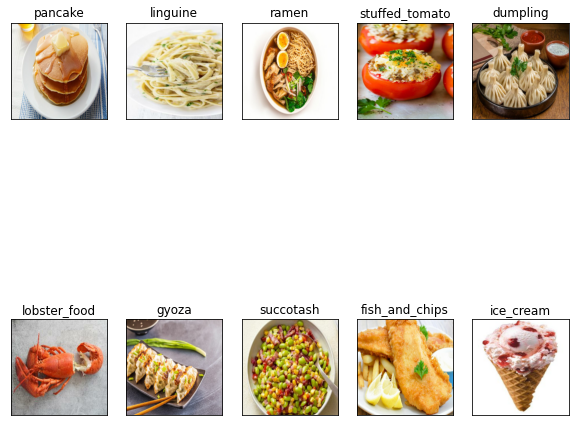

In [ ]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(new_images):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(new_pred_labels[i])
  plt.imshow(image)

In [ ]:
def plot_new_pred(prediction_probabilities, labels, images, n = 1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the predicted label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label))

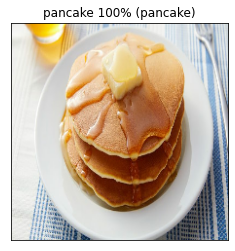

In [ ]:
plot_new_pred(new_preds, new_pred_labels, new_images, n = 0)

In [ ]:
def plot_new_pred_conf(prediction_probabilities, labels, n = 1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Get the prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Get the prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Get the prediction labels
  top_10_pred_labels = array_labels[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color = "grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")

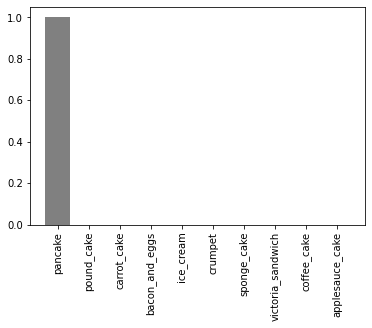

In [ ]:
plot_new_pred_conf(new_preds, new_pred_labels, n = 0)

# Referensi

In [ ]:
# https://www.tensorflow.org/tutorials/images/cnn
# https://www.tensorflow.org/tutorials/load_data/images 
# https://towardsdatascience.com/convert-images-to-tensors-in-pytorch-and-tensorflow-f0ab01383a03 
# https://stackoverflow.com/questions/51202602/convert-image-to-tensor/60828438
# https://tfhub.dev/s?module-type=image-classification 
# https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/image_classification.ipynb#scrollTo=iQ3aamrBfs-c 
# https://www.kaggle.com/mrdbourke/tensorflow-2-x-tensorflow-hub-end-to-end-example/notebook 
# https://www.kaggle.com/tahsin/ifood-2019-fast-ai-implementation 
# https://cs230.stanford.edu/blog/datapipeline/ 
# https://www.kite.com/python/answers/how-to-use-numpy-argsort-in-descending-order-in-python 